In [1]:
cols = {
'타임스탬프' : 'time',
'귀하의 이수학기 (2021 - 1학기 기준)' : 'semester',
'귀하의 주전공 학과는?' : 'major',
'복수전공 or 부전공 or 연계전공 여부' : 'otherMajoryn',
'복수전공 or 부전공 or 연계전공 학과는?' : 'otherMajor',
'귀하께서는 본인의 MBTI를 알고 있습니까?' : 'MBTIyn',
'내향형(I)인가요 외향형(E)인가요?' : 'MBTI_IE',
'감각형(S)인가요 직관형(N)인가요?' : 'MBTI_SN',
'사고형(T)인가요 감정형(F)인가요?' : 'MBTI_TF',
'판단형(J)인가요 인식형(P)인가요?' : 'MBTI_JP',
'팀플할 때 팀장 하는 스타일' : 'leader',
'친목 모임에서 선호하는 인원 수' : 'gathering',
'당신의 카톡 스타일은?' : 'chat_style',
'고양이 VS 강아지' : 'animal',
'한식 vs 양식 vs 일식 vs 중식' : 'food',
'여름 vs 겨울' : 'season',
'버스 vs 지하철' : 'transportation',
'치킨 vs 피자' : 'fastfood_choice', #?
'귀하가 사용하는 핸드폰의 브랜드' : 'cellphone',
'좋아하는 색' : 'color',
'본인은 아침형 인간 vs 올빼미형 인간' : 'lifeStyle',
'주로 몇 시에 기상하시나요? ' : 'getup',
'일주일 평균 식비는?' : 'Engel',
'최근 한달 간 책 읽은 횟수' : 'book',
'주로 공부 잘 되는 시간' : 'focus_time',
'시험공부 스타일' : 'studystyle',
'일주일에 운동, 체력단련에 투자하는 시간' : 'workout',
'QR 체크인 방식' : 'QR',
'알바 여부 (현재)' : 'partTime',
'AI를 공부한 기간' : 'AIstudy',
'SAI 노션 일주일 평균 방문횟수?' : 'notion',
'SAI 채널 구독여부' : 'subscribe',
'귀하께서 가장 익숙한 프로그래밍 언어는 무엇입니까?' : 'language',
'귀하의 프로젝트 진행횟수 (대학 재학 중)' : 'projects',
'둘다 붙었다면 카카오 VS 네이버' : 'kakao_naver',
'귀하는 현재 목(어깨)에 거북목이 있으십니까?' : 'turtle',
'노트북에 스티커를 붙이는 편인가요?' : 'sticker',
'사용하는 노트북의 브랜드' : 'laptop'
}

1. MBTI E 성향이면 Engel이 높을까?
2. MBTI E 성향이면 모임 인원 선호도의 상관성은?
3. MBTI J와 벼락치기의 상관관계는?
4. 거북목과 AI공부한 기간+ 프로젝트 횟수
5. SAI채널 구독과 Notion 방문횟수
6. 색과 카카오_네이버의 관계?
7. 이수학기 와 프로젝트 진행횟수?

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd. set_option("display.max_columns", None)

In [3]:
from matplotlib import font_manager, rc
font_path = "C:/Windows/Fonts/NGULIM.TTF"
# font_path = "‪C:/Users/fizz5/AppData/Local/Microsoft/Windows/Fonts/a옛날목욕탕L.ttf"
font = font_manager.FontProperties(fname=font_path).get_name()
rc('font', family=font)

In [4]:
df = pd.read_csv('./pj/sai_data.csv', encoding='cp949')
df = df.drop("Unnamed: 0",1)

In [5]:
df

,semester,semester_int,major,otherMajor,MBTI_IE,MBTI_SN,MBTI_TF,MBTI_JP,leader,gathering,chat_style,animal,food,season,transportation,fastfood_choice,cellphone,color,lifeStyle,getup,Engel,book,focus_time,studystyle,workout,QR,partTime,AIstudy,notion,subscribe,language,projects,kakao_naver,turtle,sticker,laptop
0,7학기,7,컴퓨터공학과,해당없음,E,N,T,J,절대 안한다.,4명 이상,선톡(내가 먼저 보낸다),고양이,한식,여름,지하철,치킨,애플,빨강,아침형 인간,6,100000,2~4권,낮 (오전~오후),꾸준히 미리 공부 해놓기,14.0,네이버,안 한다,1년 이상 ~ 2년 미만,10,네!,Python,5번 이상,네이버,네,있다,한성
1,8학기 (또는 졸업),8,호텔관광경영학과,스마트투어리즘 매니지먼트 소프트웨어,E,S,T,J,없으면 내가 한다.,3~4명,오는톡(오면 답장만 한다),고양이,한식,겨울,버스,치킨,삼성,노랑,아침형 인간,8,50000,1권 이하,밤 (저녁~새벽),벼락치기,1.0,카카오,하고 있다,1년 이상 ~ 2년 미만,2,네!,Python,1번 이상 ~ 3번 미만,카카오,네,없다,Msi
2,7학기,7,전자정보통신공학과,해당없음,I,N,T,J,없으면 내가 한다.,3~4명,선톡(내가 먼저 보낸다),고양이,양식,겨울,지하철,피자,삼성,빨강,올빼미형 인간,13,70000,2~4권,밤 (저녁~새벽),꾸준히 미리 공부 해놓기,6.0,카카오,안 한다,1년 이상 ~ 2년 미만,5,네!,MATLAB,5번 이상,네이버,아니오,없다,삼성
3,6학기,6,교육학과,글로벌미디어소프트웨어연계전공,I,S,F,J,시키면 하긴 한다.,3~4명,오는톡(오면 답장만 한다),고양이,한식,겨울,지하철,피자,삼성,검정,올빼미형 인간,11,30000,1권 이하,때때로 다르다,벼락치기,2.0,카카오,하고 있다,1년 이상 ~ 2년 미만,3,네!,Python,1번 이상 ~ 3번 미만,네이버,아니오,없다,삼성
4,3학기,3,데이터사이언스학과,비즈니스애널리틱스,E,S,T,J,나서서 한다.,10명 이상,선톡(내가 먼저 보낸다),고양이,한식,겨울,지하철,피자,삼성,검정,올빼미형 인간,10,10000,책을 읽지 않는다,때때로 다르다,꾸준히 미리 공부 해놓기,6.0,네이버,하고 있다,1년 미만,3,네!,Python,1번 이상 ~ 3번 미만,카카오,아니오,있다,LG
5,5학기,5,컴퓨터공학과,해당없음,E,N,T,J,시키면 하긴 한다.,4명 이상,오는톡(오면 답장만 한다),강아지,양식,겨울,버스,치킨,삼성,보라,올빼미형 인간,9,200000,2~4권,때때로 다르다,꾸준히 미리 공부 해놓기,4.0,네이버,안 한다,2년 이상 ~ 3년 미만,5,네!,Python,5번 이상,카카오,아니오,있다,애플
6,7학기,7,응용통계학과,해당없음,I,N,T,J,없으면 내가 한다.,3~4명,오는톡(오면 답장만 한다),강아지,한식,여름,지하철,치킨,삼성,파랑,올빼미형 인간,9,180000,1권 이하,낮 (오전~오후),꾸준히 미리 공부 해놓기,14.0,네이버,안 한다,1년 이상 ~ 2년 미만,1,네!,Python,3번 이상 ~ 5번 미만,카카오,네,없다,asus
7,3학기,3,스마트기기공학과,해당없음,I,S,F,J,없으면 내가 한다.,3~4명,오는톡(오면 답장만 한다),고양이,일식,겨울,지하철,치킨,삼성,검정,올빼미형 인간,9,70000,1권 이하,밤 (저녁~새벽),꾸준히 미리 공부 해놓기,1.0,카카오,안 한다,1년 미만,1,네!,Python,1번 이상 ~ 3번 미만,카카오,아니오,있다,LG
8,7학기,7,컴퓨터공학과,해당없음,E,N,T,J,나서서 한다.,3~4명,선톡(내가 먼저 보낸다),강아지,양식,여름,버스,치킨,애플,주황,올빼미형 인간,7,100000,1권 이하,때때로 다르다,꾸준히 미리 공부 해놓기,7.0,토스,안 한다,1년 이상 ~ 2년 미만,5,네!,JavaScript,5번 이상,네이버,아니오,있다,애플
9,1학기 이하,1,컴퓨터공학과,해당없음,I,S,T,J,시키면 하긴 한다.,3~4명,오는톡(오면 답장만 한다),고양이,한식,겨울,지하철,치킨,삼성,검정,올빼미형 인간,10,70000,책을 읽지 않는다,밤 (저녁~새벽),벼락치기,3.0,수기작성,안 한다,1년 미만,2,네!,Python,없음,카카오,네,없다,삼성


# 1. MBTI E 성향이면 Engel이 높을까?

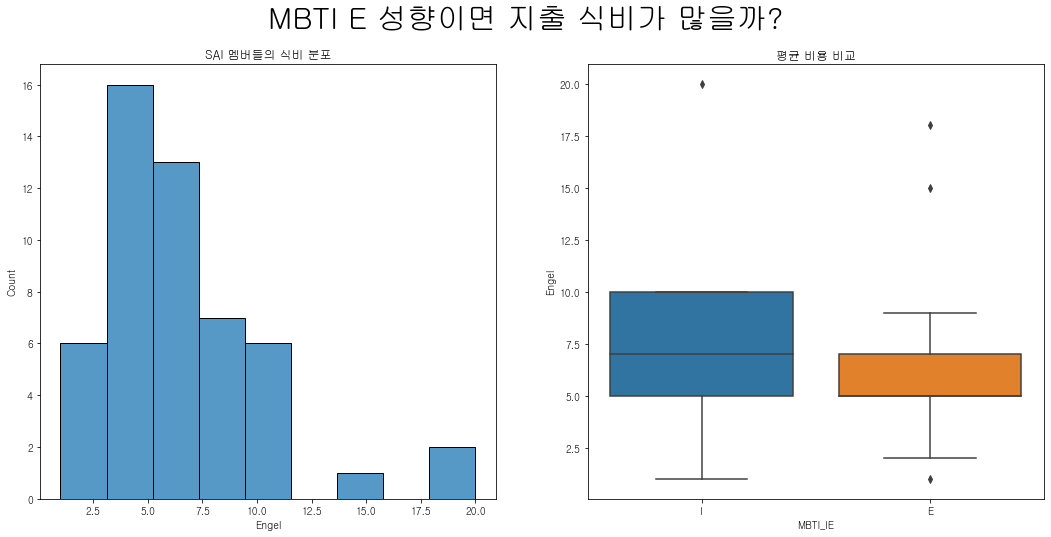

I    7.760000
E    6.115385
Name: Engel, dtype: float64


In [6]:
def enc(x):
    if x == "I":
        return 1
    else:
        return 0
df['MBTI_IE'] = df['MBTI_IE'].apply(enc)

def enc(x):
    return x/10000
df['Engel'] = df['Engel'].apply(enc).astype('int')

# 1. MBTI E 와 Engel의 상관관계

ie = df['MBTI_IE']  # I == 1, E== 0
en = df['Engel']  # 

# 개선점
# 각 박스 위에 데이터 레이블링 해주기

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("MBTI E 성향이면 지출 식비가 많을까?", fontsize=30)
_0 = sns.histplot(en, ax=ax[0])
_0.set_title("SAI 멤버들의 식비 분포")

_1 = sns.boxplot(x='MBTI_IE', y='Engel', data=df, ax=ax[1])
_1.set_title("평균 비용 비교")

ticks_2 = ['I', 'E']
_1.set_xticks(range(len(ticks_2)))
_1.set_xticklabels(ticks_2)

for c in df['MBTI_IE'].unique():
    temp = df.loc[df['MBTI_IE']==c, 'Engel']
    temp.mean()
    
group = df.groupby('MBTI_IE').agg('mean')['Engel']
group.index = ['I', 'E']
plt.show()
fig.savefig('1.png')
print(group)

# 2. MBTI E 성향이면 모임 인원 선호도의 상관성은?

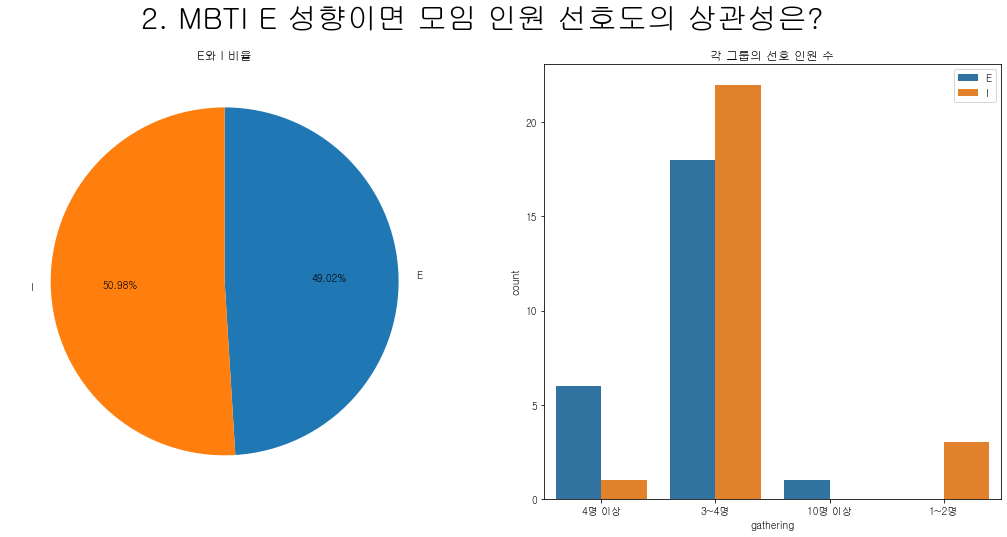

10명이상을 체크하신 한분이 'E'긴 하지만 한명이라...


In [7]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("2. MBTI E 성향이면 모임 인원 선호도의 상관성은?", fontsize=30)

labels = ['E', 'I']
values = [sum(df['MBTI_IE']==0), sum(df['MBTI_IE']==1)]

pie = ax[0].pie(values, ## 파이차트 출력
       startangle=90, ## 시작점을 90도(degree)로 지정
       counterclock=False, ## 시계 방향으로 그린다.
       autopct=lambda p : '{:.2f}%'.format(p), ## 퍼센티지 출력
       labels = labels
       )
ax[0].set_title("E와 I 비율")


_1 = sns.countplot(x='gathering', hue='MBTI_IE', data=df, ax=ax[1])
_1.set_title("각 그룹의 선호 인원 수")
_1.legend(['E','I'])

plt.show()
fig.savefig('2.png')
print("10명이상을 체크하신 한분이 'E'긴 하지만 한명이라...")

# 3. MBTI J와 벼락치기의 상관관계는?
- J는 일을 할 때 세부적으로 준비하는 계획형 사람이고, 인식형인 P는 일을 할 때 철저한 계획보다는 융통성 있게 대처하는 사람
- J는 미리 한다
- P는 벼락치기 한다.

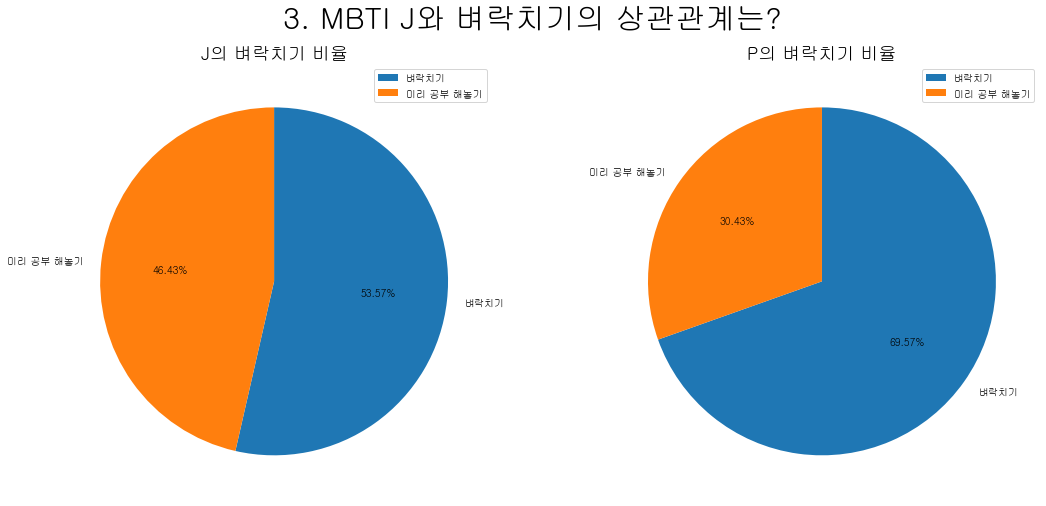

P의 벼락치기비율이 16%p 더 높았다!...
어? 이게 왜 진짜지...


In [8]:
# J의 studystyle비율,  P의 studystyle비율을 좌, 우로
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("3. MBTI J와 벼락치기의 상관관계는?", fontsize=30)

_J = df[df['MBTI_JP']=='J']
_P = df[df['MBTI_JP']=='P']
labels=["벼락치기","미리 공부 해놓기"]

ax[0].pie(_J['studystyle'].value_counts(),
         labels=labels,
         startangle=90,
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))
ax[0].set_title("J의 벼락치기 비율", fontsize=18)
ax[0].legend()

ax[1].pie(_P['studystyle'].value_counts(),
         labels=labels,
         startangle=90,
       counterclock=False,
       autopct=lambda p : '{:.2f}%'.format(p))
ax[1].set_title("P의 벼락치기 비율", fontsize=18)
ax[1].legend()
plt.show()
fig.savefig('3.png')
print("P의 벼락치기비율이 16%p 더 높았다!...")
print("어? 이게 왜 진짜지...")

# 4. 거북목과 AI공부한 기간+ 프로젝트 횟수

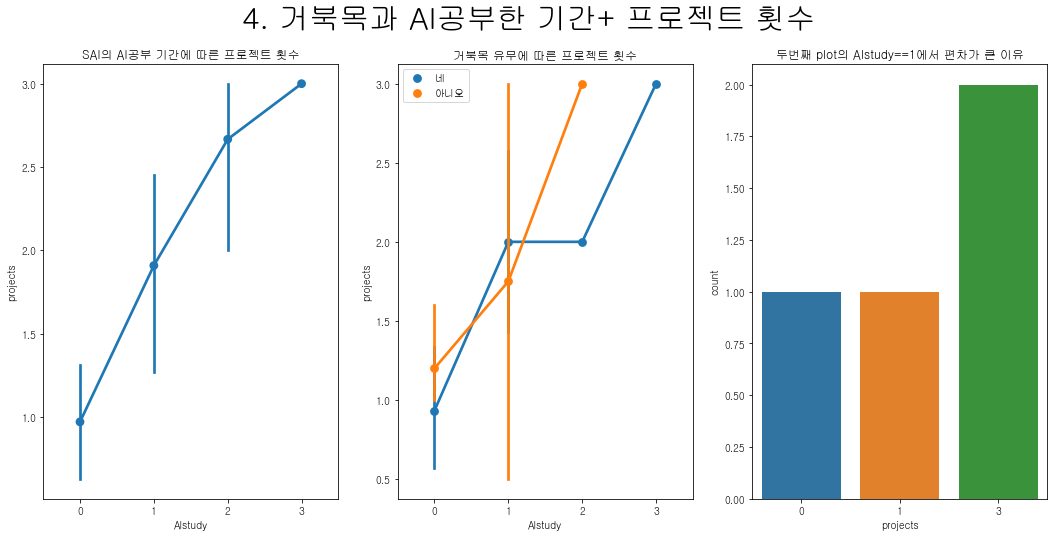

In [9]:
temp = df.copy()

def enc_study(x):
    if x == "1년 미만":
        return 0
    elif x == '1년 이상 ~ 2년 미만':
        return 1
    elif x == '2년 이상 ~ 3년 미만':
        return 2
    elif x == "3년 이상":
        return 3
    
def enc_projects(x):
    if x == "없음":
        return 0
    elif x == '1번 이상 ~ 3번 미만':
        return 1
    elif x == '3번 이상 ~ 5번 미만':
        return 2
    elif x == '5번 이상':
        return 3
    
temp['AIstudy'] = temp['AIstudy'].apply(enc_study)
temp['projects'] = temp['projects'].apply(enc_projects)

# 1. 거북목 유무로 좌우 구분
# 2. factorplot으로 x=학기, y=프로젝트 횟수

temp = df.copy()

def enc_study(x):
    if x == "1년 미만":
        return 0
    elif x == '1년 이상 ~ 2년 미만':
        return 1
    elif x == '2년 이상 ~ 3년 미만':
        return 2
    elif x == "3년 이상":
        return 3
    
def enc_projects(x):
    if x == "없음":
        return 0
    elif x == '1번 이상 ~ 3번 미만':
        return 1
    elif x == '3번 이상 ~ 5번 미만':
        return 2
    elif x == '5번 이상':
        return 3
    
temp['AIstudy'] = temp['AIstudy'].apply(enc_study)
temp['projects'] = temp['projects'].apply(enc_projects)

fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18,8))
fig.suptitle("4. 거북목과 AI공부한 기간+ 프로젝트 횟수", fontsize=30)

_0 = sns.pointplot(x='AIstudy',  y='projects', data=temp, ax=ax[0], kind='point')
_0.set_title("SAI의 AI공부 기간에 따른 프로젝트 횟수")

_1 = sns.pointplot(x='AIstudy',  y='projects', data=temp, hue='turtle', ax=ax[1], kind='point')
_1.set_title("거북목 유무에 따른 프로젝트 횟수")
_1.legend()

_2 = sns.countplot(x=temp.loc[(temp['AIstudy']==1)& (temp['turtle']=='아니오'),'projects'], ax=ax[2])
_2.set_title('두번째 plot의 AIstudy==1에서 편차가 큰 이유')
fig.savefig('4.png')
plt.show()

# 5. SAI채널 구독과 Notion 방문횟수

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


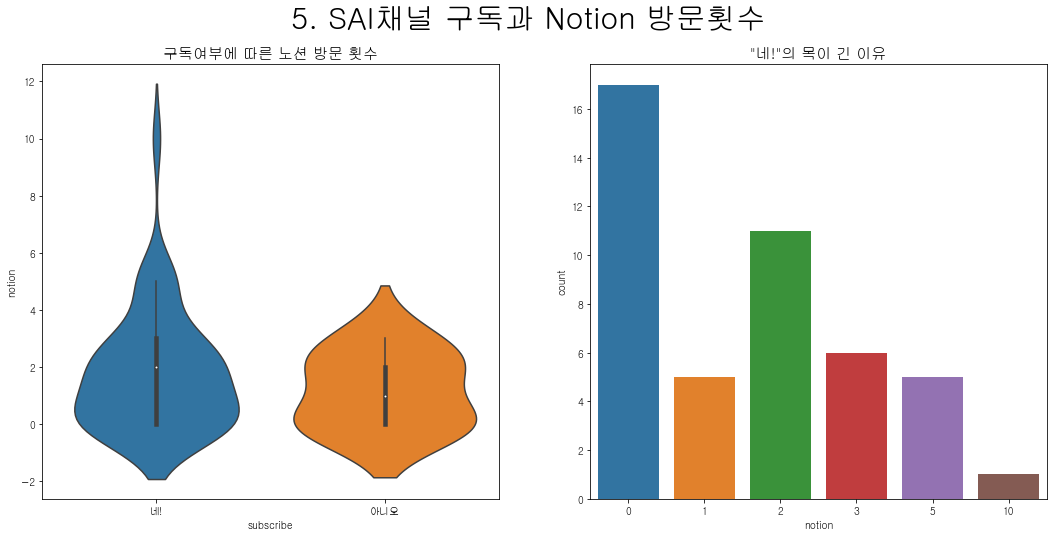

,notion
subscribe,
네!,1.777778
아니오,1.166667


In [10]:
## 구독 여부와 Notion방문 횟수 countplot
# yes or no 로 분리하고 box plot? violoin plot?
temp = df.copy()
temp = temp[['subscribe', 'notion']]

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("5. SAI채널 구독과 Notion 방문횟수", fontsize=30)


_0 = sns.violinplot(x='subscribe', y='notion', data=temp, ax=ax[0])
_0.set_title('구독여부에 따른 노션 방문 횟수', fontsize=15)

_1 = sns.countplot(temp.loc[temp['subscribe']=='네!', 'notion'], ax=ax[1])
_1.set_title('"네!"의 목이 긴 이유', fontsize=15)

plt.show()
fig.savefig('5.png')
temp.groupby('subscribe').agg('mean')

# 6. 색과 카카오_네이버의 관계?

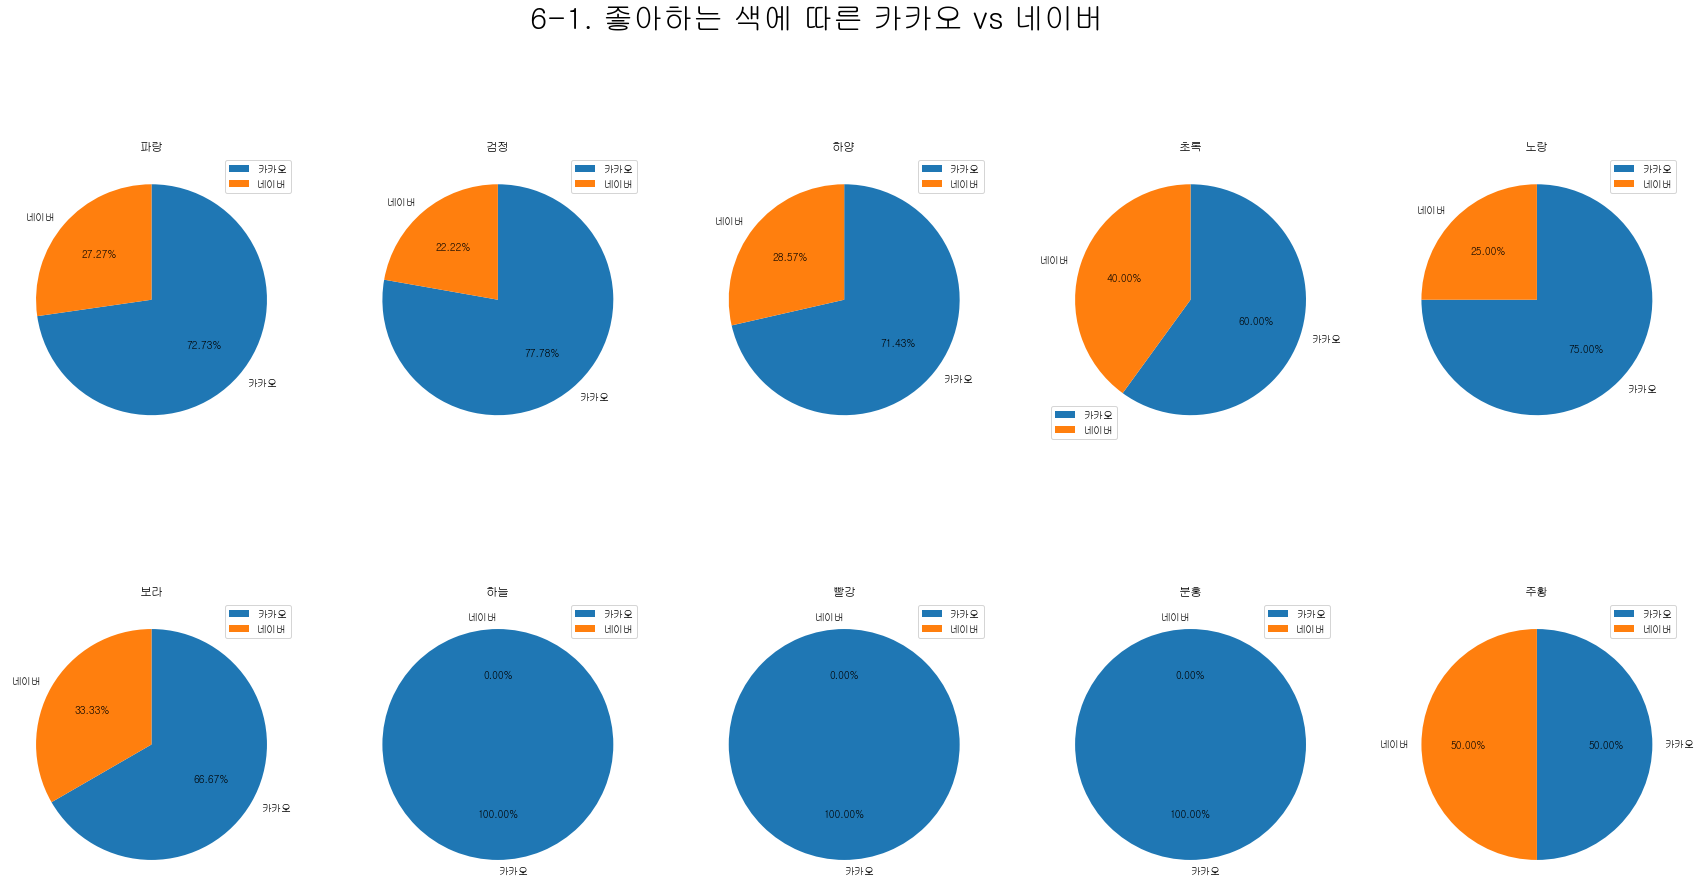

In [11]:
temp = df.copy()
color_dic = {
    '파랑':0,
    '검정':1,
    '하양':2,
    '초록':3,
    '노랑':4,
    '보라':5,
    '하늘':6,
    '빨강':7,
    '분홍':8,
    '주황':9,
    '연두':10,
    '로즈골드':11,
    '살구':12
}
reverse = {
    0: '파랑',
    1: '검정',
    2: '하양',
    3: '초록',
    4: '노랑',
    5: '보라',
    6: '하늘',
    7: '빨강',
    8: '분홍',
    9: '주황',
    10: '연두',
    11: '로즈골드',
    12: '살구'
         }


def enc_color(x):
    return color_dic[x]

nk_dic = {
    '네이버':0,
    '카카오':1
}
def enc_nk(x):
    return nk_dic[x]

temp['color'] = temp['color'].apply(enc_color)
temp['kakao_naver'] = temp['kakao_naver'].apply(enc_nk)

fig, axes = plt.subplots(nrows=2, ncols=5, figsize=(30,15))
fig.suptitle("6-1. 좋아하는 색에 따른 카카오 vs 네이버", fontsize=30)
# color를 하나씩 꺼내서 pieplot 그려보기
cnt = 0
for row in range(2):
    for col in range(5):
        if cnt >=13:
            break
        ax = axes[row][col]
        if sum(temp['color']==cnt) <=1:
            pass
        else:
            data = temp.loc[temp['color']==cnt, 'kakao_naver'].value_counts()
            if len(data) == 1:
                data = [data.values[0],0]
            ax.pie(
                data,
                labels = ['카카오','네이버'],
                startangle=90,
                counterclock=False,
                autopct=lambda p : '{:.2f}%'.format(p)
            )
            ax.set_title(reverse[cnt])
            ax.legend()
        cnt +=1
fig.savefig('6_1.png')        

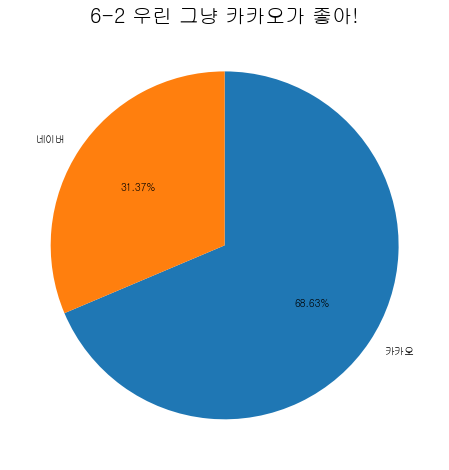

In [12]:
fig = plt.figure(figsize=(8,8))
ax = fig.gca()
ax.set_title('6-2 우린 그냥 카카오가 좋아!', fontsize=20)
ax.pie(temp.kakao_naver.value_counts(),
        labels = ['카카오','네이버'],
        startangle=90,
        counterclock=False,
        autopct=lambda p : '{:.2f}%'.format(p)
      )
plt.show()
fig.savefig('6_2.png')

# 7. 이수학기 와 프로젝트 진행횟수?

C:\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


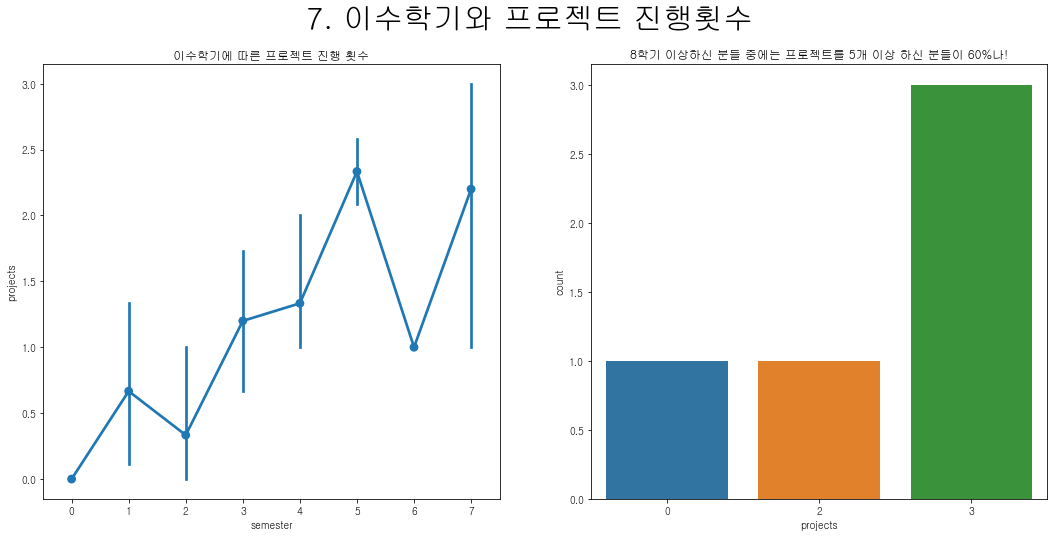

In [13]:
temp = df.copy()
sem_dic = {
    "1학기 이하": 0,
    '3학기': 1,
    '4학기': 2,
    '5학기':3,
    '6학기':4,
    '7학기':5,
    '8학기 (또는 졸업)':6,
    '8학기 이상 (또는 졸업)':7
}
def enc_sem(x):
    return sem_dic[x]
prj_dic = {
    '없음': 0,
    '1번 이상 ~ 3번 미만': 1,
    '3번 이상 ~ 5번 미만':2,
    '5번 이상':3
}
def enc_prj(x):
    return prj_dic[x]


temp['semester'] = temp['semester'].apply(enc_sem)
temp['projects'] = temp['projects'].apply(enc_prj)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(18,8))
fig.suptitle("7. 이수학기와 프로젝트 진행횟수", fontsize=30)

sns.pointplot(x='semester', y='projects', data=temp, ax=ax[0])
ax[0].set_title('이수학기에 따른 프로젝트 진행 횟수')

temp = temp.loc[temp['semester']==7, :]
sns.countplot(temp['projects'], ax=ax[1])
ax[1].set_title('8학기 이상하신 분들 중에는 프로젝트를 5개 이상 하신 분들이 60%나!')
fig.savefig('7.png')